In [25]:
import pandas as pd
import numpy as np
!pip install nltk
!pip install textblob
import nltk
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Abhinandan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinandan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
file_path='./data/comment_file - Sheet2 (1).csv'
comments = pd.read_csv(file_path) # read the collected raw data

In [3]:
comments.head() # checking sample of the tabular data

Comment
0                       Just look at this australoid
1  Rahi baat muslim ki <br>Wo har govt. Me ek jai...
2  Aaj India me 80 crore log 1 time ka khana modi...
3  Ladki ko chedna Islam ne sikhaya waah <br>To r...
4  Tumne guru nanak ji ke sabse priye sathi kon t...

In [4]:
# converting .csv file to .txt for read string readability

text = list(comments['Comment'])
text = ' '.join(str(e) for e in text)
text

'Just look at this australoid Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hunger index <br>BSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai Ladki ko chedna Islam ne sikhaya waah <br>To raavan ne kya kiya tha sita maa ke sath Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado <br>Joki the bhai Mastana<br>Or wo bhi muslim the Ask log bhukh say

In [5]:
# defining function to check the most frequently occuring word

def plot_word_frequency(words, top_n):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    sns.set(rc = {'figure.figsize':(15,8)})
    plot = sns.barplot(labels, counts)
    print(labels)
    return plot

['the', 'is', 'and', 'to', 'of', 'a', 'in', 'are', 'you', 'he']


c:\users\abhinandan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

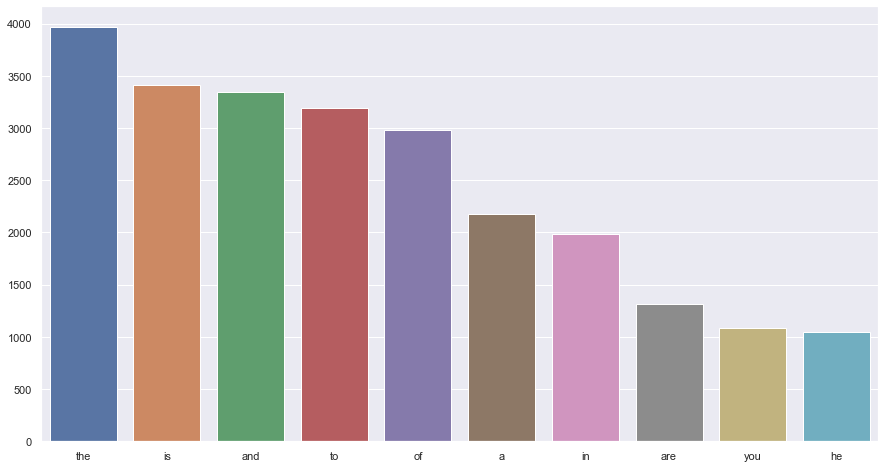

In [6]:
# frequently occuring words with unclean data(i.e. common phrases and acronyms present)
words = text.split()
plot_word_frequency(words, 10)

In [7]:
# defining stopwords i.e. unnecessary filler texts

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# constructing custom stopword list

english = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'hai','I','ko','ki','ke','se','ka',',','like','.','The','He','This','one', 'bhi', 'aur', 'k','nahi', 'don&#39;t','ye', 'man','u', 'rss','<a','know','ho', 'guy', 'hi', 'even','h','ne', 'bhai', 'video', 'kya','also', 'and', 'said','rss', 'say']

In [9]:
words

['Just',
 'look',
 'at',
 'this',
 'australoid',
 'Rahi',
 'baat',
 'muslim',
 'ki',
 '<br>Wo',
 'har',
 'govt.',
 'Me',
 'ek',
 'jaisa',
 'h',
 '<br>Up',
 'congress',
 'me',
 'masjid',
 'me',
 '400',
 'muslim',
 'ko',
 'goli',
 'mari',
 '<br>Up',
 'samajwadi',
 'me',
 'muzzafarnagar',
 'riots',
 'me',
 'yahi',
 'hua',
 '<br>Up',
 'bjp',
 'me',
 'same',
 'situation',
 'hai',
 '<br>BSS',
 'bsp',
 'me',
 'thoda',
 'sukun',
 'tha',
 'mila',
 'kuch',
 'nhi',
 'BSS',
 'jaan',
 'maal',
 'ka',
 'nuksaan',
 'nhi',
 'hua',
 'hai',
 'Aaj',
 'India',
 'me',
 '80',
 'crore',
 'log',
 '1',
 'time',
 'ka',
 'khana',
 'modi',
 'ke',
 'photo',
 'waale',
 'rasan',
 'bag',
 'par',
 'nirbhar',
 'h',
 '<br>Independent',
 'India',
 'ki',
 'nayi',
 'soch',
 'h',
 'ye',
 '<br>Make',
 'in',
 'India',
 '<br>Logo',
 'ko',
 'free',
 'me',
 'do',
 'yahi',
 'soch',
 'k',
 'vote',
 'denge',
 'baaki',
 '<br>Hunger',
 'index',
 '<br>Human',
 'right',
 'index',
 '<br>Freedom',
 'of',
 'media',
 '<br>Human',
 'developm

In [10]:
# cleaning the text i.e. removing stopwords

sample_words = [word.lower() for word in words if word not in english]
print(sample_words)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', '<br>wo', 'har', 'govt.', 'me', 'ek', 'jaisa', '<br>up', 'congress', 'masjid', '400', 'muslim', 'goli', 'mari', '<br>up', 'samajwadi', 'muzzafarnagar', 'riots', 'yahi', 'hua', '<br>up', 'bjp', 'situation', '<br>bss', 'bsp', 'thoda', 'sukun', 'tha', 'mila', 'kuch', 'nhi', 'bss', 'jaan', 'maal', 'nuksaan', 'nhi', 'hua', 'aaj', 'india', '80', 'crore', 'log', '1', 'time', 'khana', 'modi', 'photo', 'waale', 'rasan', 'bag', 'par', 'nirbhar', '<br>independent', 'india', 'nayi', 'soch', '<br>make', 'india', '<br>logo', 'free', 'yahi', 'soch', 'vote', 'denge', 'baaki', '<br>hunger', 'index', '<br>human', 'right', 'index', '<br>freedom', 'media', '<br>human', 'development', 'index<br>democracy', 'index<br>global', 'economic', 'freedom', 'index<br>gender', 'gap', 'index<br>global', 'curruption', 'index', '<br>global', 'hunger', 'index', '<br>bss', 'ek', 'baar', 'jaake', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'l

In [11]:
sample_text = " ".join(sample_words)
print(sample_text)

just look australoid rahi baat muslim <br>wo har govt. me ek jaisa <br>up congress masjid 400 muslim goli mari <br>up samajwadi muzzafarnagar riots yahi hua <br>up bjp situation <br>bss bsp thoda sukun tha mila kuch nhi bss jaan maal nuksaan nhi hua aaj india 80 crore log 1 time khana modi photo waale rasan bag par nirbhar <br>independent india nayi soch <br>make india <br>logo free yahi soch vote denge baaki <br>hunger index <br>human right index <br>freedom media <br>human development index<br>democracy index<br>global economic freedom index<br>gender gap index<br>global curruption index <br>global hunger index <br>bss ek baar jaake dekhlo pata chal jayega aapko modi yogi kiya ladki chedna islam sikhaya waah <br>to raavan kiya tha sita maa sath tumne guru nanak ji sabse priye sathi kon btado <br>joki mastana<br>or wo muslim ask log bhukh nahi khha khaa kar mar rahy h.<br>bimarioo say.<br>karan jajdda khaana.😱🙏 most hindus enjoy nice juicy medium rare steak...with side order crispy ch

['hindu', 'islam', 'india', 'religion', 'people', 'muslim', 'muslims', 'hindus', 'bible', 'christianity', 'god', 'country', 'quran', 'christian', 'hinduism']


c:\users\abhinandan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

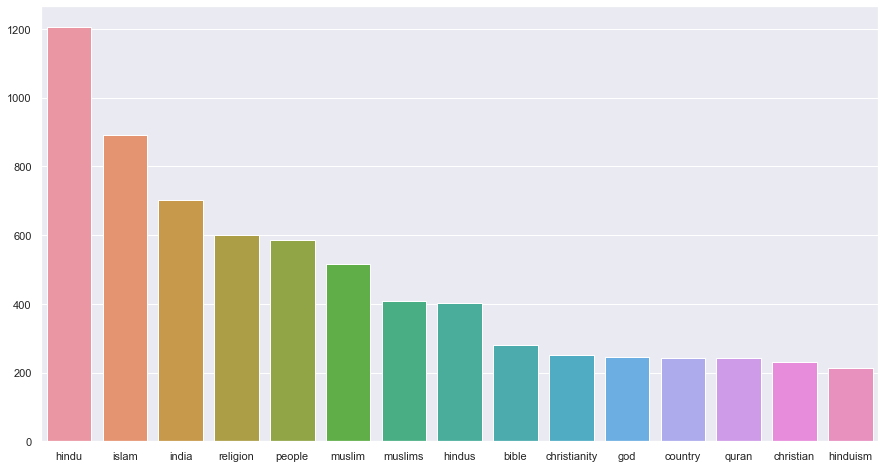

In [12]:
# plotting new word frequency with cleaned data

plot_word_frequency(sample_words, 15)

In [35]:
words_in_txt=sample_text.split( )
print (words_in_txt)

['just', 'look', 'australoid', 'rahi', 'baat', 'muslim', '<br>wo', 'har', 'govt.', 'me', 'ek', 'jaisa', '<br>up', 'congress', 'masjid', '400', 'muslim', 'goli', 'mari', '<br>up', 'samajwadi', 'muzzafarnagar', 'riots', 'yahi', 'hua', '<br>up', 'bjp', 'situation', '<br>bss', 'bsp', 'thoda', 'sukun', 'tha', 'mila', 'kuch', 'nhi', 'bss', 'jaan', 'maal', 'nuksaan', 'nhi', 'hua', 'aaj', 'india', '80', 'crore', 'log', '1', 'time', 'khana', 'modi', 'photo', 'waale', 'rasan', 'bag', 'par', 'nirbhar', '<br>independent', 'india', 'nayi', 'soch', '<br>make', 'india', '<br>logo', 'free', 'yahi', 'soch', 'vote', 'denge', 'baaki', '<br>hunger', 'index', '<br>human', 'right', 'index', '<br>freedom', 'media', '<br>human', 'development', 'index<br>democracy', 'index<br>global', 'economic', 'freedom', 'index<br>gender', 'gap', 'index<br>global', 'curruption', 'index', '<br>global', 'hunger', 'index', '<br>bss', 'ek', 'baar', 'jaake', 'dekhlo', 'pata', 'chal', 'jayega', 'aapko', 'modi', 'yogi', 'kiya', 'l

In [ ]:
print(len(words_in_txt))

## Read file line by line

In [48]:
# Own text file
f = open("./data/abc.txt", "r", encoding="utf8",errors="ignore")
c=0
for line in f:
    # print(line)
    c+=1
print("No. of lines:",c)

Comment

Just look at this australoid

Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai

Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hunger index <br>BSS ek baar jaake dekhlo pata chal jayega aapko modi yogi ne kya kiya hai

Ladki ko chedna Islam ne sikhaya waah <br>To raavan ne kya kiya tha sita maa ke sath

Tumne guru nanak ji ke sabse priye sathi kon the ye bhi btado <br>Joki the bhai Mastana<br>Or wo bhi muslim the

Ask 

Yai hinduooo ko apna abu akbar bohat yaad ata hai orangzaib or muhammad bin qasim yaad nhi aata

Jinnah said that the muslims in India will spend their whole lives trying to prove themselves to India....

HINDUstan!!!! <br>PORKistan supporters in our country...????????

Hindu will rule the world.. It&#39;s natural..

"Really sad about what These guys are taught in family , school , society ..."

"??????????? ????? ??????

<br>????? ????????? ????? ??

<br>(Non-violence is the ultimate dharma. So too is violence in service of Dharma)"

Hindus have always been persecuted. They are persecuted in places where they are a minority. Do a bit of research instead of carrying forth this idea of negationism with regard to the plight and suffering of the Hindus.

"Read this Wikipedia article: <a href=""https://en.wikipedia.org/wiki/Persecution_of_Hindus"">https://en.wikipedia.org/wiki/Persecution_of_Hindus</a>"

?????????? ??????<br>?????????????

This idiot don&#39;t know any thing about islam an


Modi&#39;s era about to End in 2019 ????

I feel sorry for him.

"The man is right, Christian and Islamic crusades have caused a lot of destruction globally"

within 50 seconds he says RSS. anything he said after that wasn&#39;t a surprise.

"Can they make video on psedo seculars...World is suffering badly due to appeasement...Still shameless secular media is performing their practices...Can they deny that invaders like khlilji ,Babar ,Gauri destroyed the books and temples architects...Bastard they were ..."

Iske dimag mai rss ka kachra bhar diya gaya hai... Or kuch nahi..

"Islamophobia has been spoonfed  to him....he has no proper knowledge of islam and what the Quran says.....it is the duty of muslims to not only spread awareness about true islam but to practically demonstrate the true virtues of a Muslim.....this is how we can help build our society n help it prosper help our nation prosper.....i think those who do divisive politics are the biggest threat to the development of my

In [71]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
f = open("./data/abc.txt", "r", encoding="utf8",errors="ignore")
neg=pos=0
count=0
total_score_pos=total_score_neg=0
for line in f:
    if(count<=100):
        blob = TextBlob(line, analyzer=NaiveBayesAnalyzer())
        senti=blob.sentiment.classification
        pos_score=blob.sentiment.p_pos
        neg_score=blob.sentiment.p_neg
        total_score_pos+=pos_score
        total_score_neg+=neg_score
        
        print(blob)
        print("Postivity:",pos_score,"\t","Negativity:",neg_score)
        count+=1
        print('---------------------------------')

print("Total Positive score",total_score_pos)
print("Total Negative score",  total_score_neg)
if(total_score_pos> total_score_neg):
    ratio=total_score_pos/ total_score_neg
    print("Pos to Neg ratio", ratio,":","1")
else:
    ratio= total_score_neg/total_score_pos
    print("Neg to Pos ratio", ratio,":","1")
    

Comment

Postivity: 0.44642857142857145 	 Negativity: 0.5535714285714283
---------------------------------
Just look at this australoid

Postivity: 0.4502583092535126 	 Negativity: 0.5497416907464872
---------------------------------
Rahi baat muslim ki <br>Wo har govt. Me ek jaisa h <br>Up congress me masjid me 400 muslim ko goli mari <br>Up samajwadi me muzzafarnagar riots me yahi hua <br>Up bjp me same situation hai <br>BSS bsp me thoda sukun tha mila kuch nhi BSS jaan maal ka nuksaan nhi hua hai

Postivity: 0.28386423198551647 	 Negativity: 0.7161357680144843
---------------------------------
Aaj India me 80 crore log 1 time ka khana modi ke photo waale rasan bag par nirbhar h <br>Independent India ki nayi soch h ye <br>Make in India <br>Logo ko free me do yahi soch k vote denge baaki <br>Hunger index <br>Human right index <br>Freedom of media <br>Human development index<br>Democracy index<br>Global economic freedom index<br>Gender gap index<br>Global curruption index <br>Global hu

?? HINDU RASHTRO BANEGA ????

Postivity: 0.833333333333333 	 Negativity: 0.16666666666666646
---------------------------------
"So shame on him. Thanks god, that many millions of Hindu still exist in Indian who doesn&#39;t believe the ideology he believes ???"

Postivity: 0.9991093920305764 	 Negativity: 0.000890607969420198
---------------------------------
"Bharat Mata ki Jai , Jai sri ram , jai modi ji ????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????"

Postivity: 0.027777777777777714 	 Negativity: 0.9722222222222229
---------------------------------
I am Pakistani and i live in sindh(most hindu population) i have hindu frnds too the things he said i never heard from my frnd complaining this

Postivity: 0.9415854550462207 	 Negativity: 0.0584145449537776
---------------------------------
Bhai sb apny jo reference diye AL QURAN surah Tobah  ka ap ik lin kat k bta de k non Muslim ka 

"Fu*k you left , Proud Hindu"

Postivity: 0.8536732382176341 	 Negativity: 0.14632676178236667
---------------------------------
Jab tmhari islam sy dushmani hey tu musalman sy b hey aur jab christenity sy dushmani hey tu christen sy b hey

Postivity: 0.07320872274143288 	 Negativity: 0.9267912772585665
---------------------------------
"<a href=""https://www.youtube.com/watch?v=vrxW7n73C7s&amp;t=2m18s"">2:18</a> - <a href=""https://www.youtube.com/watch?v=vrxW7n73C7s&amp;t=2m25s"">2:25</a> this is not written anywhere in Bible. Why such hate ?"

Postivity: 0.4683760621455389 	 Negativity: 0.5316239378544617
---------------------------------
Left Agenda driven video but failed  seems scripted and created for special audience ...real challenge are much more dangerous.

Postivity: 0.8638067215277442 	 Negativity: 0.13619327847225765
---------------------------------
This man is mostly true

Postivity: 0.688157951533879 	 Negativity: 0.3118420484661213
---------------------------------
Ba

Bloody whiner! How is force feeding beef any different from stopping another from eating beef

Postivity: 0.5028288953823458 	 Negativity: 0.4971711046176532
---------------------------------
This is west teaching such a old civilization how to govern<br>Where plastic surgery was practied first<br>Where sugar was first discovered <br>One day They will starve karma will hit you

Postivity: 0.4587644906970782 	 Negativity: 0.5412355093029232
---------------------------------
This man should be a politician ! What a legend I would take a hindu extremist over a Islamic one any day

Postivity: 0.9733396390157345 	 Negativity: 0.026660360984263484
---------------------------------
"Once M population reaches 51% in lndia, will the country remain secular?"

Postivity: 0.8890730518985395 	 Negativity: 0.11092694810146084
---------------------------------
The Title of this Video is totally WRONG....

Postivity: 0.2401907058220363 	 Negativity: 0.7598092941779638
---------------------------------